# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [3]:
data.shape

(4870, 65)

In [4]:
data['race1']=pd.get_dummies(data.race)['w']
w = data[data.race=='w']
b = data[data.race=='b']

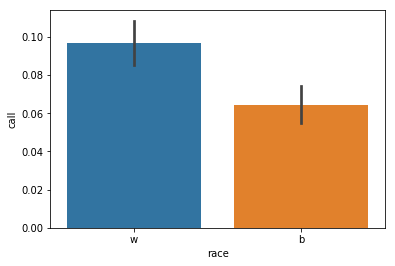

In [5]:
sns.barplot(x='race', y='call', data=data)
plt.show()

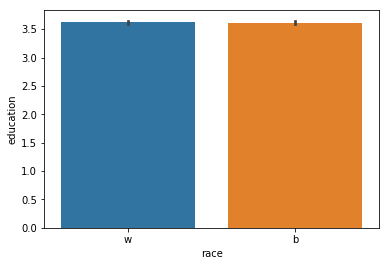

In [6]:
sns.barplot(x='race', y='education', data=data)
plt.show()

In [7]:
print('Total of race b: ',sum(data.race=='b'))
print('Total of success of race b: ', sum(data[data.race=='b'].call))
print('Total of Failure of race b: ', sum(data.race=='b')-sum(data[data.race=='b'].call))

Total of race b:  2435
Total of success of race b:  157.0
Total of Failure of race b:  2278.0


In [8]:
print('Total of race w: ',sum(data.race=='w'))
print('Total of success of race w: ', sum(data[data.race=='w'].call))
print('Total of Failure of race w: ', sum(data.race=='w')-sum(data[data.race=='w'].call))

Total of race w:  2435
Total of success of race w:  235.0
Total of Failure of race w:  2200.0


In [9]:
white = sum(data[data.race=='w'].call) 
black = sum(data[data.race=='b'].call)
wb = sum(data.call)
print('From the totall callbacks, %6.2F percent is white' % (100*white/wb))
print('From the totall callbacks, %6.2F percent is black' % (100*black/wb))

From the totall callbacks,  59.95 percent is white
From the totall callbacks,  40.05 percent is black


In [10]:
print('Liklihood of getting a callback is %6.3F percent ' % (100*data.call.sum()/len(data.call)))

Liklihood of getting a callback is  8.049 percent 


In [11]:
rate_w=(sum(data[data.race=='w'].call))/sum(data.race=='w')
rate_b=(sum(data[data.race=='b'].call))/sum(data.race=='b')
print('The white rate callback is %6.3F percent'%(100*rate_w))
print('The black rate callback is %6.3F percent'%(100*rate_b))

The white rate callback is  9.651 percent
The black rate callback is  6.448 percent


Looks like people with race=w are getting more callbacks.


# What test is appropriate for this problem? Does CLT apply? 


- The aim of this analysis is to find out if the difference is indeed significant or if the race and callbacks are statistically independent.


- Do we have the Requirements for CLT?

    1- The sample size for both groups are much greater than 30.

    2- It looks like that the observations are independent. In other words, no observation affects any other observation in our given dataframe.
    
    3- The sample size should be large enough so that:
    
       rate_b.len(b)>= 10, (1-rate_b).len(b)>= 10

       rate_w.len(w)>=10, (1-rate_w).len(b)>=10 


In [12]:
rate_b*len(b), (1-rate_b)*len(b) #They are both larger than 10

(157.0, 2278.0)

In [13]:
rate_w*len(w), (1-rate_w)*len(w) #They are both larger than 10

(235.0, 2200.0)


- **Conclusion: Z-test and Chi-square test are appropriate for this problem and CLT applies.**

# What are the null and alternate hypotheses?


- **Null hypothesis:  H0: Rate of call for both races is same, rate_b-rate_w=0**
- **Alternate hypothesis:  Ha: Rate of call for races are different, rate_b-rate_w!=0**

# Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

-  Significance level is 0.05, the corresponding confidence level is 95%.
- If the P value is less than the significance (alpha) level, the hypothesis test is statistically significant.
- If the confidence interval does not contain the null hypothesis value, the results are statistically significant.
- The significance level defines the distance the sample mean must be from the null hypothesis to be considered statistically significant.
- The confidence level defines the distance for how close the confidence limits are to sample mean.

** z_test**

In [14]:
diff= rate_w - rate_b
sigma_diff =np.sqrt((rate_w * (1-rate_w) /len(w)) + (rate_b * (1-rate_b)/len(b)))
print('Difference between race_b and race_w is %6.4F'% diff)
print('Std is %6.4F' % sigma_diff)


z=(diff-0)/sigma_diff
p_z=(1-stats.norm.cdf(z))*2
print('P_value is %6.6F' %p_z)


z_score=1.96 #for 95% confidence interval
ME = z_score * sigma_diff #Margin  of error

lower =diff- ME
upper = diff + ME

print('Margin of Error: %6.4F '% ME)
print('Confidence Interval [%6.4F, %6.4F]'% (lower, upper))


Difference between race_b and race_w is 0.0320
Std is 0.0078
P_value is 0.000039
Margin of Error: 0.0153 
Confidence Interval [0.0168, 0.0473]


- The margin of error is 1.53% for a confidence level of 95% (z-value of 1.96). The confidence interval is [0.0168, 0.0473]
- p_value is extremly smaller than alpha=0.05, so we have to reject the null hypothesis.

**Chi-Square test**

In [15]:
Total_Success=rate_b*len(b)+rate_w*len(w)
Total=(1-rate_b)*len(b)+(1-rate_w)*len(w)

Estimate_array=np.array([[Total_Success/2, Total_Success/2],[Total/2, Total/2]])
print('Estimates array is:',Estimate_array)

Real_array=np.array([[rate_b*len(b),rate_w*len(w)],[(1-rate_b)*len(b),(1-rate_w)*len(w)]])
print('Real array is:',Real_array)

Estimates array is: [[ 196.  196.]
 [2239. 2239.]]
Real array is: [[ 157.  235.]
 [2278. 2200.]]


In [16]:
chi2=(Estimate_array-Real_array)**2/Estimate_array
chi2=np.sum(chi2)
DF=(2-1)*(2-1)
print('chi2 is:',chi2)
print('Degree of freedom is:', DF)
print('p_value is:', (1-stats.chi2.cdf(chi2,DF)))

chi2 is: 16.87905041427022
Degree of freedom is: 1
p_value is: 3.983886837588546e-05


The p_value is extremly smaller than alpha=0.05. This means we have to reject the null-hypothesis and there is a correlcation between race and the callback. 

Bootstrapping

In [17]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data =np.concatenate((data1,data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates =np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] =func(perm_sample_1,perm_sample_2)

    return perm_replicates


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [18]:
size = 100000
bs_replicates_w = np.empty(size)
bs_replicates_b = np.empty(size)

for i in range(size):
    bs_w = np.random.choice(w['call'],len(w['call']))
    bs_b = np.random.choice(b['call'],len(b['call']))
    bs_replicates_w[i] = np.mean(bs_w)
    bs_replicates_b[i] = np.mean(bs_b)
    
w_conf_interval = np.percentile(bs_replicates_w,[2.5,97.5])
b_conf_interval = np.percentile(bs_replicates_b,[2.5,97.5])

w_margin_error = z*(np.std(w.call)/(np.sqrt(len(w.call))))
b_margin_error = z*(np.std(b.call)/(np.sqrt(len(b.call))))
                                   
perm_reps = draw_perm_reps(b.call, w.call, diff_of_means, 10000)
p = np.sum(perm_reps >= diff)/10000
print('The white people confidence interval is ', w_conf_interval,'. The white people margin of error is ', w_margin_error, 'The black people confidence interval is ', b_conf_interval,'. The black people margin of error is ', b_margin_error,  '. The P statistic is', p)

The white people confidence interval is  [0.08501027 0.10841889] . The white people margin of error is  0.024627460796355038 The black people confidence interval is  [0.0550308  0.07433265] . The black people margin of error is  0.020483542577775685 . The P statistic is 0.0


- ** Conclusion: The p-value obtained from both the z-test, the chi-square and bootstrap technique are much lower than the significance level. Therefore, we can safely reject the null hypothesis. This means there is a correlation existing between race and callbacks.**

# Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

 Base on the above implied tests, There is a clear correlation between the race and the callback success of a particular person. This means there is a discrimination taking place in the industry based on race.
 However, I don't conclude that race is the most important factor for callback success. Other parameters such as experience, education, sex or age may also have important roles in the callbacks. So the relationship between all these variables have to be establish to decide the final conclusion.

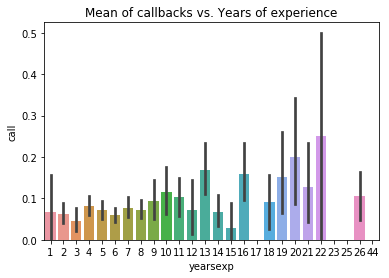

In [19]:
sns.barplot(x="yearsexp",y="call",data=data)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()

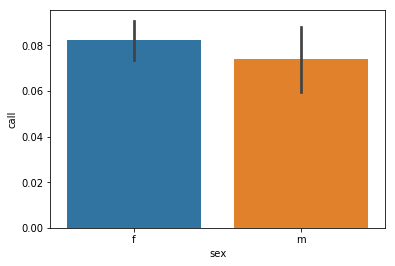

In [20]:
sns.barplot(x="sex",y="call",data=data)
plt.show()

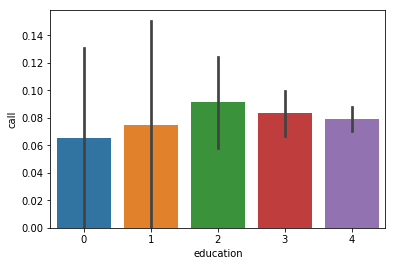

In [21]:
sns.barplot(x='education',y="call",data=data)
plt.show()

Base on the plotted barplots, it looks like that people with higher experience are getting more callbacks. However, eduaction and sex are not that related to callbacks. 

is whether there is an education difference between white and black sounding names that could explain the discrepancy in call-backs. 